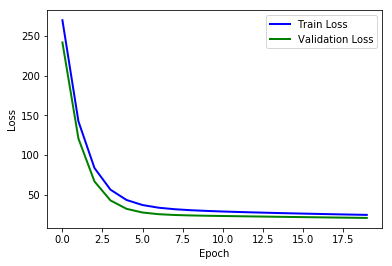

In [3]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

if __name__ == '__main__':
    # step1: Load the experiment data
    t_X,t_y = load_svmlight_file("F:/PythonExs/lab_one/housing_scale")

    # step2: Divide dataset
    X_train, X_valid, y_train, y_valid  = train_test_split(t_X,t_y,test_size=0.33,random_state=42)
    X_train = np.array(X_train.toarray())
    X_valid = np.array(X_valid.toarray())
    X_train = np.insert(X_train,0,values=np.ones(len(X_train)),axis=1)
    X_valid = np.insert(X_valid,0,values=np.ones(len(X_valid)),axis=1)

    # step3: Initialize parameters
    np.random.seed(42)
    w = np.array(np.random.randn(14))
    eta = 1e-4
    l_train = []
    l_validation = []

    # step4: Iteration
    for i in range(20):
        pred_train = X_train.dot(w.T)
        pred_valid = X_valid.dot(w.T)
        l_train.append(np.square(y_train-pred_train).sum()/(2*len(X_train)))
        l_validation.append(np.square(y_valid-pred_valid).sum()/(2*len(X_valid)))
        # print(l_train,l_validation)
        grad_pred_train = 2*(pred_train-y_train)
        grad_w = X_train.T.dot(grad_pred_train)
        w -= eta * grad_w

    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(l_train,'b',linewidth='2',label='Train Loss')
    plt.plot(l_validation,'g',linewidth='2',label='Validation Loss')
    plt.legend()
    plt.show()